<a href="https://colab.research.google.com/github/yukta2106/ML-ANN-Experiments/blob/main/ML_Exp_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install hmmlearn library (required for HMM implementation)
!pip install hmmlearn

import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm

# Set a random seed for reproducibility
np.random.seed(42)

# Define the hidden states and observations
# Hidden States: 0 = 'Cold', 1 = 'Hot'
# Observations: 0 = 'No Umbrella', 1 = 'Umbrella' (Simulated as mean/variance for HMM)
states = ["Cold", "Hot"]
n_states = len(states)
observations = ["No Umbrella", "Umbrella"]
n_observations = 2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 kB 4.2 MB/s eta 0:00:00


In [2]:
## 2. Define HMM Parameters

# Start Probability (Pi): Initial probability of starting in each state
start_probability = np.array([0.6, 0.4]) # 60% chance of starting Cold, 40% chance of starting Hot

# Transition Matrix (A): Probability of moving from one hidden state to another
# A[i, j] = P(State_t = j | State_{t-1} = i)
transition_probability = np.array([
    [0.7, 0.3],  # P(Cold -> Cold) = 0.7, P(Cold -> Hot) = 0.3
    [0.4, 0.6]   # P(Hot -> Cold) = 0.4, P(Hot -> Hot) = 0.6
])

# Emission (Observation) Parameters (B): P(Observation | Hidden State)
# For the GaussianHMM, we define the mean and covariance for each hidden state's observation.

# State 0 ('Cold'): Mean observation is closer to 'Umbrella' (1)
means = np.array([[0.8], [0.1]]) # If Cold (0.8), if Hot (0.1). High mean -> more umbrellas.

# Covariance: Low variance for distinct observations
covars = np.array([[0.1], [0.1]])

print("HMM Parameters Defined.")

HMM Parameters Defined.


In [3]:
## 3. Model Training and Data Generation

# Create a Gaussian HMM model
model = hmm.GaussianHMM(n_components=n_states, covariance_type="diag", n_iter=100)

# Set the defined parameters directly (Instead of fitting to data, for a clear demonstration)
model.startprob_ = start_probability
model.transmat_ = transition_probability
model.means_ = means
model.covars_ = covars

# Generate a sequence of 15 samples (a sequence of observations)
# The model internally generates the hidden states (weather) and the corresponding observations (umbrella usage)
X_test, Z_test = model.sample(15)

# Convert continuous observations to discrete labels (0 or 1) for easier interpretation
# Rule: If observation is > 0.5, it's 'Umbrella' (1); otherwise 'No Umbrella' (0)
X_test_discrete = (X_test > 0.5).astype(int).flatten()

print(f"Generated Sequence Length: {len(X_test_discrete)}")
print("True Hidden States (Z_test):", [states[z] for z in Z_test.flatten()])
print("Observed Data (X_test):  ", [observations[x] for x in X_test_discrete])

Generated Sequence Length: 15
True Hidden States (Z_test): ['Cold', 'Cold', 'Cold', 'Hot', 'Cold', 'Cold', 'Cold', 'Cold', 'Cold', 'Cold', 'Cold', 'Cold', 'Cold', 'Cold', 'Cold']
Observed Data (X_test):   ['No Umbrella', 'Umbrella', 'Umbrella', 'No Umbrella', 'Umbrella', 'Umbrella', 'No Umbrella', 'Umbrella', 'Umbrella', 'Umbrella', 'Umbrella', 'Umbrella', 'Umbrella', 'Umbrella', 'Umbrella']



-- HMM Decoding Results (Viterbi) --
Observations (Umbrella): ['No Umbrella', 'Umbrella', 'Umbrella', 'No Umbrella', 'Umbrella', 'Umbrella', 'No Umbrella', 'Umbrella', 'Umbrella', 'Umbrella', 'Umbrella', 'Umbrella', 'Umbrella', 'Umbrella', 'Umbrella']
True Hidden States (Weather):  ['Cold', 'Cold', 'Cold', 'Hot', 'Cold', 'Cold', 'Cold', 'Cold', 'Cold', 'Cold', 'Cold', 'Cold', 'Cold', 'Cold', 'Cold']
Predicted Hidden States (Weather): ['Cold', 'Cold', 'Cold', 'Cold', 'Cold', 'Cold', 'Hot', 'Cold', 'Cold', 'Cold', 'Cold', 'Cold', 'Cold', 'Cold', 'Cold']


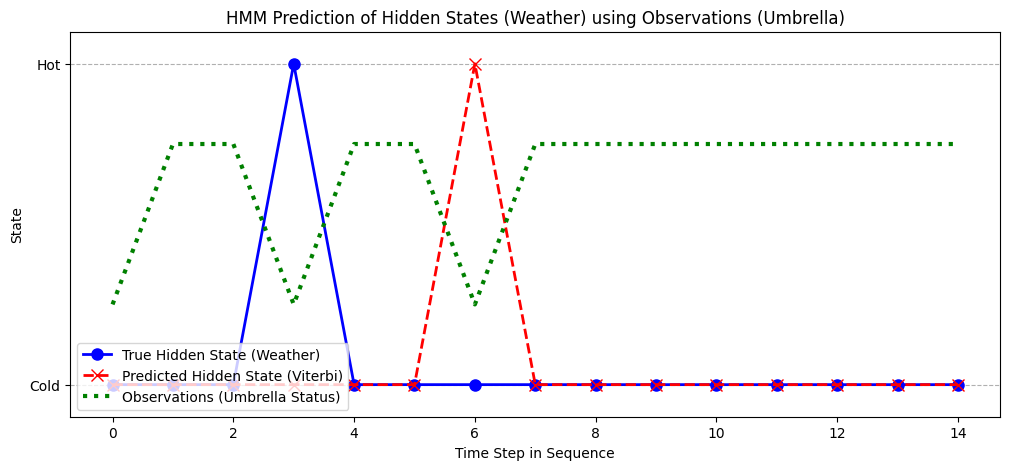


Decoding Accuracy: 86.67%


In [4]:
## 4. Decoding (Prediction) and Visualization

# The Viterbi algorithm finds the most likely sequence of hidden states
log_prob, Z_predicted = model.decode(X_test, algorithm="viterbi")

# Convert predicted state indices back to labels
Z_predicted_labels = [states[z] for z in Z_predicted]
Z_true_labels = [states[z] for z in Z_test.flatten()]

print("\n-- HMM Decoding Results (Viterbi) --")
print("Observations (Umbrella):", [observations[x] for x in X_test_discrete])
print("True Hidden States (Weather): ", Z_true_labels)
print("Predicted Hidden States (Weather):", Z_predicted_labels)

# --- Visualization ---

# Convert labels back to numerical indices for plotting
Z_true_indices = Z_test.flatten()
Z_predicted_indices = Z_predicted

# Create a sequence index for the x-axis
sequence_index = np.arange(len(Z_true_indices))

plt.figure(figsize=(12, 5))
plt.plot(sequence_index, Z_true_indices, 'b-o', label='True Hidden State (Weather)', linewidth=2, markersize=8)
plt.plot(sequence_index, Z_predicted_indices, 'r--x', label='Predicted Hidden State (Viterbi)', linewidth=2, markersize=8)

# Add observation data for context (scaled to fit the plot range)
# We offset the observation line slightly for better visibility
plt.plot(sequence_index, X_test_discrete * 0.5 + 0.25, 'g:', label='Observations (Umbrella Status)', linewidth=3)


plt.yticks([0, 1], states)
plt.title("HMM Prediction of Hidden States (Weather) using Observations (Umbrella)")
plt.xlabel("Time Step in Sequence")
plt.ylabel("State")
plt.legend(loc='lower left')
plt.grid(axis='y', linestyle='--')
plt.ylim(-0.1, 1.1)
plt.show()

# Calculate Accuracy (Simple comparison of predicted vs true)
accuracy = np.sum(Z_predicted == Z_true_indices) / len(Z_true_indices)
print(f"\nDecoding Accuracy: {accuracy * 100:.2f}%")